<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [3]:
df = pd.read_csv(r"carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


**Car Mileage Vs Sell Price ($)**

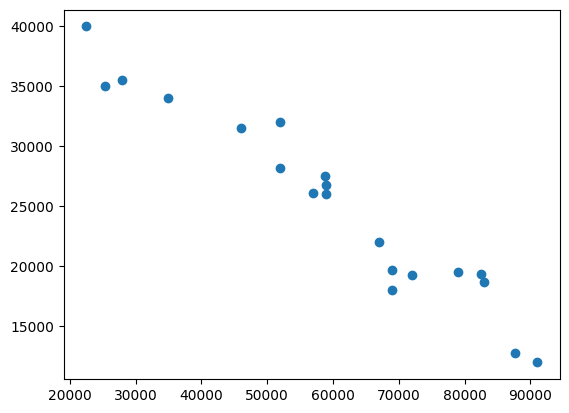

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

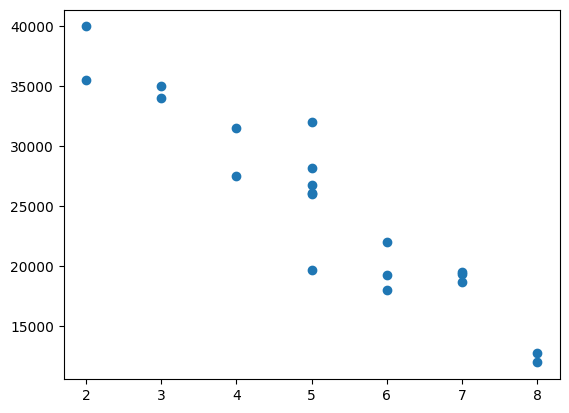

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [6]:
X = df[['Mileage','Age(yrs)']]

In [7]:
y = df['Sell Price($)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) 

In [15]:
X_train

,Mileage,Age(yrs)
11,79000,7
3,22500,2
18,87600,8
16,28000,2
13,58780,4
2,57000,5
9,67000,6
19,52000,5
4,46000,4
12,59000,5


In [16]:
X_test

,Mileage,Age(yrs)
0,69000,6
17,69000,5
15,25400,3
1,35000,3
8,91000,8
5,59000,5


In [17]:
y_train

11    19500
3     40000
18    12800
16    35500
13    27500
2     26100
9     22000
19    28200
4     31500
12    26000
7     19300
10    18700
14    19400
6     32000
Name: Sell Price($), dtype: int64

In [18]:
y_test

0     18000
17    19700
15    35000
1     34000
8     12000
5     26750
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
X_test

,Mileage,Age(yrs)
0,69000,6
17,69000,5
15,25400,3
1,35000,3
8,91000,8
5,59000,5


In [46]:
model.predict(X_test)

array([22451.34756242, 22668.06439958, 38329.70942843, 34976.70876322,
       14333.9540303 , 26160.77342585])

In [47]:
y_test

0     18000
17    19700
15    35000
1     34000
8     12000
5     26750
Name: Sell Price($), dtype: int64

In [48]:
model.score(X_test, y_test)

0.8911199230718785

In [49]:
model.coef_

array([  -0.3492709 , -216.71683717])

In [50]:
model.intercept_

47851.340866643

In [51]:
y_pred = model.predict(X)

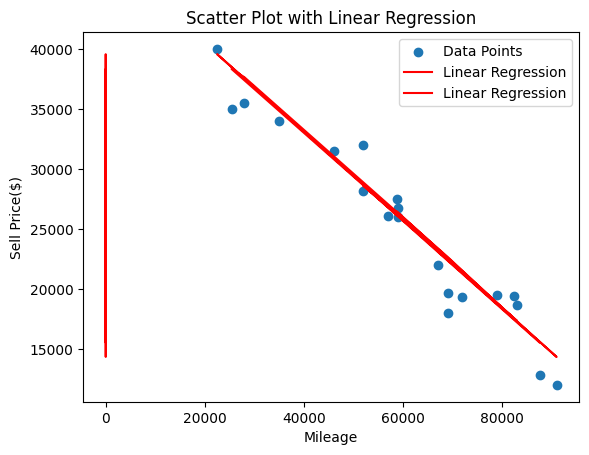

In [52]:
plt.scatter(df['Mileage'], df['Sell Price($)'], label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.show()

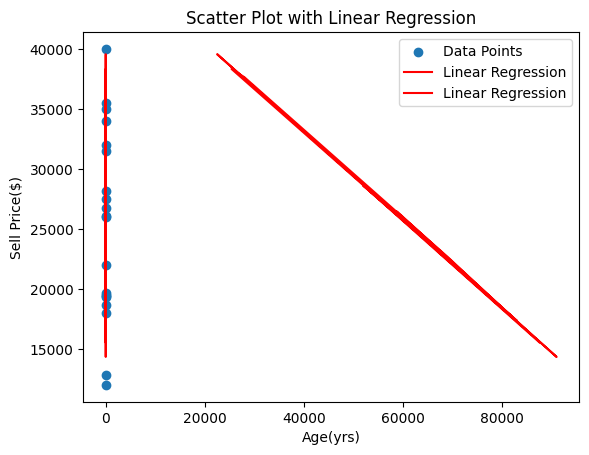

In [53]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.show()